# Infinite dimensional family of vacuum cosmological models with Taub NUT type extensions by Moncrief
##  Geoff Cope
##  Univeristy of Utah
##  December 30, 2021

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,theta,x2,x3,dt,dtheta,dx2,dx3 = symbols( 't theta x2 x3 dt dtheta dx2 dx3' ) 

In [4]:
W = Function('W')(t,theta)
W

In [5]:
a = Function('a')(t,theta)
a

In [6]:
variables = Matrix( [t,theta,x2,x3] )
variables

⎡t ⎤
⎢  ⎥
⎢θ ⎥
⎢  ⎥
⎢x₂⎥
⎢  ⎥
⎣x₃⎦

In [7]:
differentials = Matrix( [dt,dtheta,dx2,dx3] ) 
differentials

⎡  dt  ⎤
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎢ dx₂  ⎥
⎢      ⎥
⎣ dx₃  ⎦

In [8]:
lineElement = expand(exp(2*a) * (-dt**2 + dtheta**2 ) + (t*exp(2*W))*(dx2**2) + (t*exp(-2*W))*(dx3**2))
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅a(t, θ)                                         ⎤
⎢-ℯ               0            0              0      ⎥
⎢                                                    ⎥
⎢              2⋅a(t, θ)                             ⎥
⎢     0       ℯ                0              0      ⎥
⎢                                                    ⎥
⎢                            2⋅W(t, θ)               ⎥
⎢     0           0       t⋅ℯ                 0      ⎥
⎢                                                    ⎥
⎢                                          -2⋅W(t, θ)⎥
⎣     0           0            0        t⋅ℯ          ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅a(t, θ)                                         ⎤
⎢-ℯ               0            0              0      ⎥
⎢                                                    ⎥
⎢              2⋅a(t, θ)                             ⎥
⎢     0       ℯ                0              0      ⎥
⎢                                                    ⎥
⎢                            2⋅W(t, θ)               ⎥
⎢     0           0       t⋅ℯ                 0      ⎥
⎢                                                    ⎥
⎢                                          -2⋅W(t, θ)⎥
⎣     0           0            0        t⋅ℯ          ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t theta x2 x3")
t,theta,x2,x3 = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡∂            ∂                                                                            
⎢⎢──(a(t, θ))  ──(a(t, θ))                              0                                   
⎢⎢∂t           ∂θ                                                                           
⎢⎢                                                                                          
⎢⎢∂            ∂                                                                            
⎢⎢──(a(t, θ))  ──(a(t, θ))                              0                                   
⎢⎢∂θ           ∂t                                                                           
⎢⎢                                                                                          
⎢⎢                           ⎛       2⋅W(t, θ) ∂              2⋅W(t, θ)⎞  -2⋅a(t, θ)        
⎢⎢                          -⎜- 2⋅t⋅ℯ         ⋅──(W(t, θ)) - ℯ         ⎟⋅ℯ                  
⎢⎢                           ⎝                 ∂t                     

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                   ∂                                       
⎢                 2     2              2            ──(a(t, θ))                             
⎢    ⎛∂          ⎞     ∂              ∂             ∂t             1                  ∂     
⎢- 2⋅⎜──(W(t, θ))⎟  - ───(a(t, θ)) + ───(a(t, θ)) + ─────────── + ────            - 2⋅──(W(t
⎢    ⎝∂t         ⎠      2              2                 t           2                ∂t    
⎢                     ∂t             ∂θ                           2⋅t                       
⎢                                                                                           
⎢                                            ∂                                              
⎢                                            ──(a(t, θ))                                 2  
⎢                  ∂           ∂             ∂θ                             ⎛∂          ⎞   
⎢              - 2⋅──(W(t, θ))⋅──(W(t, θ)) + ───────────              

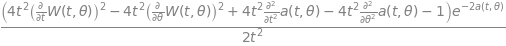

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                      ⎛                  2 
⎢                                                                      ⎜   2 ⎛∂          ⎞  
⎢                                                   ∂             0.25⋅⎜4⋅t ⋅⎜──(W(t, θ))⎟  
⎢                 2     2              2            ──(a(t, θ))        ⎜     ⎝∂t         ⎠  
⎢    ⎛∂          ⎞     ∂              ∂             ∂t                 ⎝                    
⎢- 2⋅⎜──(W(t, θ))⎟  - ───(a(t, θ)) + ───(a(t, θ)) + ─────────── + ──────────────────────────
⎢    ⎝∂t         ⎠      2              2                 t                                  
⎢                     ∂t             ∂θ                                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                        ∂                                                  
⎢               2                2   1.0⋅──(a(t, θ))                                        
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂t            0.25              ∂           ∂      
⎢- ⎜──(W(t, θ))⎟  - ⎜──(W(t, θ))⎟  + ─────────────── + ────          - 2⋅──(W(t, θ))⋅──(W(t,
⎢  ⎝∂t         ⎠    ⎝∂θ         ⎠           t            2               ∂t          ∂θ     
⎢                                                       t                                   
⎢                                                                                           
⎢                                      ∂                                                    
⎢                                      ──(a(t, θ))                          2               
⎢            ∂           ∂             ∂θ                      ⎛∂          ⎞    ⎛∂          
⎢        - 2⋅──(W(t, θ))⋅──(W(t, θ)) + ───────────           - ⎜──(W(t

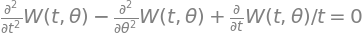

In [35]:
equation2pt2 =Eq(expand((1/t)*Ric.tensor()[2,2].args[0]),0)
equation2pt2

In [23]:
equation2pt3 = Eq(diff(a,theta),solve( einst.tensor()[1,0] , diff(a,theta) )[0])
equation2pt3

In [30]:
equation2pt4 = Eq(diff(a,t),solve( einsteinSimplified[0,0], diff(a,t) )[0] ) 
equation2pt4

In [37]:
vacuumFieldEquations = Matrix([equation2pt2,equation2pt3,equation2pt4])
vacuumFieldEquations

⎡                                   ∂                    ⎤
⎢       2              2            ──(W(t, θ))          ⎥
⎢      ∂              ∂             ∂t                   ⎥
⎢     ───(W(t, θ)) - ───(W(t, θ)) + ─────────── = 0      ⎥
⎢       2              2                 t               ⎥
⎢     ∂t             ∂θ                                  ⎥
⎢                                                        ⎥
⎢       ∂                 ∂           ∂                  ⎥
⎢       ──(a(t, θ)) = 2⋅t⋅──(W(t, θ))⋅──(W(t, θ))        ⎥
⎢       ∂θ                ∂t          ∂θ                 ⎥
⎢                                                        ⎥
⎢                             2                  2       ⎥
⎢∂               ⎛∂          ⎞      ⎛∂          ⎞    0.25⎥
⎢──(a(t, θ)) = t⋅⎜──(W(t, θ))⎟  + t⋅⎜──(W(t, θ))⎟  - ────⎥
⎣∂t              ⎝∂t         ⎠      ⎝∂θ         ⎠     t  ⎦